In [78]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential, Model, load_model, save_model
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, Activation, Input) 
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score   

In [45]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [31]:
train.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [46]:
y_train = train['label']
train.drop(columns =['label'], inplace = True)
train.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [14]:
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [47]:
train = np.asarray(train, dtype='float32')
test = np.asarray(test, dtype = 'float32')
y_train = np.asarray(y_train, dtype = 'int32')

In [48]:
x_train,x_val,y_train,y_val = train_test_split(train,y_train,test_size=.1, random_state=42)

print('train size: ', len(x_train))
print('val size: ', len(x_val))

train size:  37800
val size:  4200


In [49]:
x_train.shape

(37800, 784)

In [54]:
x_train = x_train.reshape((-1,28,28,1))
x_val = x_val.reshape((-1,28,28,1))
test = test.reshape((-1,28,28,1))
x_val.shape

(4200, 28, 28, 1)

In [55]:
test.shape

(28000, 28, 28, 1)

Text(0.5, 1.0, '8')

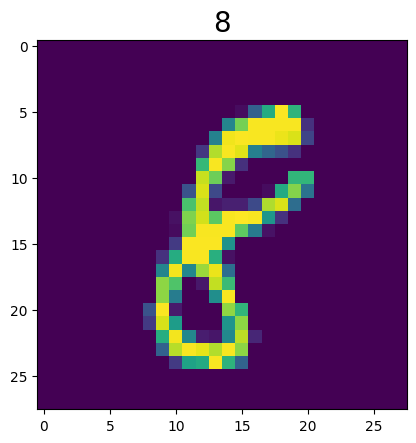

In [62]:
plt.imshow(x_train[0])
plt.title(y_train[0],fontsize=20)

In [65]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [70]:
model.compile(optimizer = tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [72]:
history = model.fit(x_train,y_train, validation_data = (x_val,y_val), epochs=12, verbose=1, batch_size=128)

Epoch 1/12
296/296 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.9957 - loss: 0.0122 - val_accuracy: 0.9836 - val_loss: 0.0858
Epoch 2/12
296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.9961 - loss: 0.0122 - val_accuracy: 0.9838 - val_loss: 0.0803
Epoch 3/12
296/296 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.9951 - loss: 0.0136 - val_accuracy: 0.9819 - val_loss: 0.0942
Epoch 4/12
296/296 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9963 - loss: 0.0128 - val_accuracy: 0.9869 - val_loss: 0.0786
Epoch 5/12
296/296 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.9958 - loss: 0.0152 - val_accuracy: 0.9821 - val_loss: 0.0929
Epoch 6/12
296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.9985 - loss: 0.0044 - val_accuracy: 0.9833 - val_loss: 0.0974
Epoch 7/12
296/296 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.9943 - loss: 0.0188 - val_accuracy: 0.9817 - val_loss: 0.1086
Epoch 8/12
296/296 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.9969 - loss: 0.0100 - 

875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


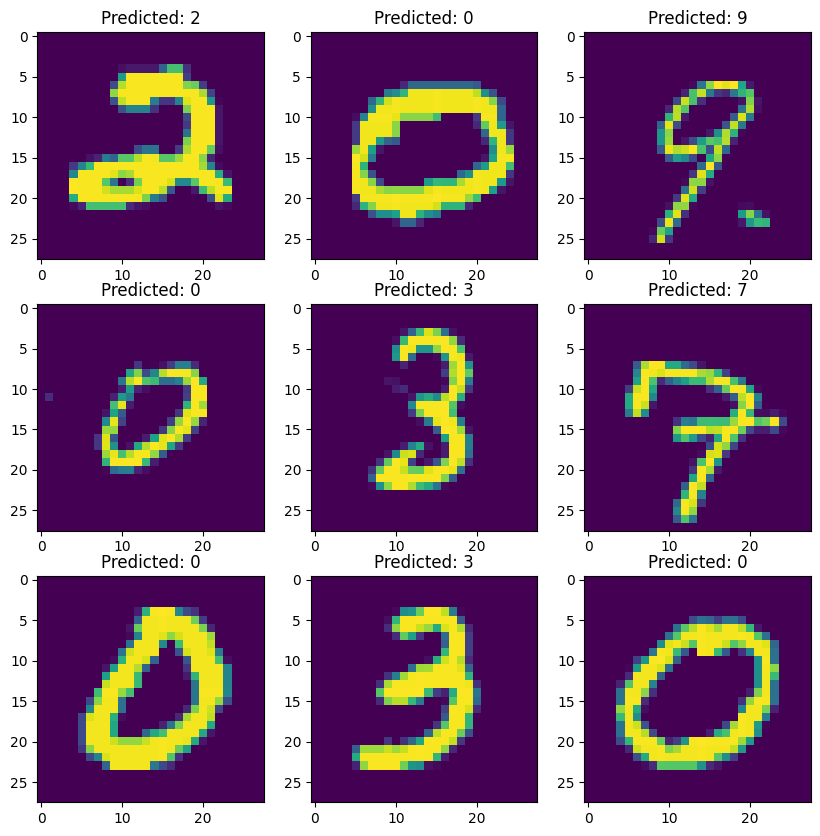

In [81]:
y_pred = model.predict(test)

plt.figure(figsize=(10,10))
for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(test[i])
    plt.title(f'Predicted: {np.argmax(y_pred[i])}')

